In [20]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
import seaborn as sns
from scipy import stats
plt.style.use('classic')
from matplotlib.backends.backend_pdf import PdfPages

% matplotlib inline
%load_ext autoreload
% autoreload

import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
data = pd.read_csv('/data/good data storage.csv')

In [22]:
drop_index = [61, 155, 190]
for i in drop_index:
    data.drop(i, inplace=True)

In [23]:
data.columns

Index(['File name', 'Age', 'Pip number', 'E-I', 'Reci', 'Artifact', 'IS100',
       'Trial number before', 'Trial number after', 'Protocol', 'Elimi',
       'Notes', 'Ptl_note'],
      dtype='object')

In [6]:
# age_thres = 23
# data_young_uni = data[(data.Age < age_thres)&(data.Reci == 0)&(data['E-I']==1)]
# data_young_reci = data[(data.Age < age_thres)&(data.Reci == 1)&(data['E-I']==1)]
# data_old_uni = data[(data.Age >= age_thres)&(data.Reci == 0)&(data.IS100==1)&(data['E-I']==1)]
# data_old_reci = data[(data.Age >= age_thres)&(data.Reci == 1)&(data.IS100==1)&(data['E-I']==1)]
# print("data_young_uni:{},data_young_reci:{}"
#       .format(len(data_young_uni),len(data_young_reci)))
# print("data_old_uni:{},data_old_reci:{}"
#       .format(len(data_old_uni),len(data_old_reci)))

In [5]:
data_ie = data[(data['E-I'] == 0)&(data['IS100'] == 1)]
data_uni = data[(data.Reci == 0)&(data['E-I']==1)]
data_reci = data[(data.Reci == 1)&(data['E-I']==1)]
print("data_uni:{},data_reci:{}, data_ie:{}"
      .format(len(data_uni),len(data_reci), len(data_ie)))

data_uni:25,data_reci:121, data_ie:16


In [6]:
data[(data.Reci == 1)&(data['E-I']==1)].iloc[0:5]

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
12,2016092903,29,2,1,1,0,1,"4,5","7,8",2,0,NaN,50Hz EI preonly
14,2016091201,28,2,1,1,0,1,"16,17,18","21,22,23,24,25",2,13,NaN,50Hz EI preonly
15,2016100201,26,1,1,1,0,2,"3,4","6,7,8",2,0,NaN,50Hz EI preonly
16,2016100303,27,1,1,1,0,2,"4,5","8,9,10,11,12",2,7,Increased PPR,50Hz EI preonly
17,2016100304,27,2,1,1,0,2,11,"13,14,15,16",2,4,"Reduced onset tau, incrased decay tau",50Hz EI preonly


In [13]:
data_reci = data[(data.Reci == 1)&(data['E-I']==1)]
i=6
data_reci_tmp = data[(data.Reci == 1)&(data['E-I']==1)].iloc[(i-1)*20:i*20]
patch_pip.df_ana(data_reci_tmp, '/data/processed_EI_reci_all_5')

In [8]:
# patch_pip.df_ana(data_reci, '/data/processed_reci')

In [9]:
# patch_pip.df_ana(data_uni, '/data/processed_uni')

In [10]:
# patch_pip.df_ana(data_ie, '/data/processed_ie')

In [24]:
# patch_pip.df_ana(data_young_reci, '/data/prcessed_young_reci')
# processed_old_reci = patch_pip.df_ana(data_old_reci, '/data/prcessed_old_reci')
# processed_young_reci = pd.read_pickle('/data/processed_young_rbeci')
processed_uni = pd.read_pickle('/data/processed_uni')
#processed_reci = pd.read_pickle('/data/processed_reci')

In [ ]:
plt.hist(data_uni.Age)

In [ ]:
processed_reci.iloc[0].Before.keys()

In [ ]:
data_reci.iloc[processed_reci.index].head()

In [25]:
# Evaluate the difference of each parameter along age
# Compare PPR bewteen reci and uni
age_reci = []
ppr_reci = []
rs_reci = []
fail_reci = []
rin_reci = []
onsettau_reci = []
decaytau_reci = []

for j in range(5):
    processed_reci = pd.read_pickle('/data/processed_EI_reci_all_{index}'.format(index=j))
    #processed_reci_ppr = processed_reci.copy()
    #processed_reci_ppr.drop(159, axis=0, inplace=True)
    for i, df, age in zip(processed_reci.Before.index, processed_reci.Before, data_reci.loc[processed_reci.index]['Age']):
        if data_reci.loc[i]['IS100'] > 0:
            ppr_reci.append(np.nanmean(df['PPR']))       
            rs_reci.append(np.nanmean(df['rs']))            
            rin_reci.append(np.nanmean(df['ir']))     
            fail_reci.append(np.nanmean(df['failure']))
            onsettau_reci.append(np.nanmean(df['onset_tau'])) 
            decaytau_reci.append(np.nanmean(df['decay_tau']))
            age_reci.append(np.nanmean(age))
            
for i, df, age in zip(processed_uni.Before.index, processed_uni.Before, data_uni.loc[processed_uni.index]['Age']):
        if data_uni.loc[i]['IS100'] > 0:
            ppr_reci.append(np.nanmean(df['PPR']))       
            rs_reci.append(np.nanmean(df['rs']))            
            rin_reci.append(np.nanmean(df['ir']))     
            fail_reci.append(np.nanmean(df['failure']))
            onsettau_reci.append(np.nanmean(df['onset_tau'])) 
            decaytau_reci.append(np.nanmean(df['decay_tau']))
            age_reci.append(np.nanmean(age))

print(len(age_reci))

123


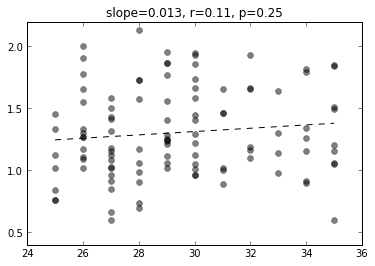

In [26]:
age_reci = np.array(age_reci).reshape(-1,1)
ppr_reci = np.array(ppr_reci).reshape(-1,1)
age_ppr_ei = pd.DataFrame(data=np.concatenate([age_reci, ppr_reci], axis=1), columns=['age', 'PPR'])
age_ppr = age_ppr_ei.groupby(['age'])['PPR'].apply(list)
age_arr = []
ppr_arr = []
for age, ppr in zip(list(age_ppr.index), age_ppr.values):
    ppr = np.array(ppr)
    ppr[np.where(ppr>2.5)[0]]=np.nan
    ppr = ppr[np.logical_not(np.isnan(ppr))]
    if age >= 25:
        plt.plot(np.ones(len(ppr))*age, ppr, 'ko', alpha=0.5)
        age_arr.append(np.ones(len(ppr))*age)
        ppr_arr.append(ppr)
age_arr = np.hstack(age_arr)
ppr_arr = np.hstack(ppr_arr)
slope, intercept, r, p, _ = stats.linregress(age_arr, ppr_arr)
x = np.arange(min(age_arr), max(age_arr)+1, 1)
y = x * slope + intercept
plt.plot(x, y, 'k--')
plt.title('slope={slope:.2}, r={r:.2}, p={p:.2}'.format(slope=slope, r=r, p=p))
with PdfPages('/data/E_I_age_PPR.pdf') as pdf:
    pdf.savefig()

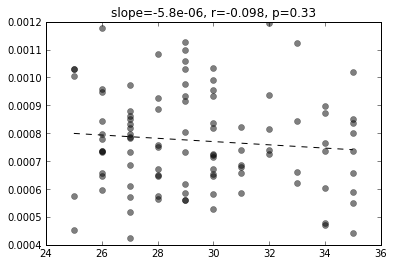

In [27]:
onsettau_reci_arr = np.array(onsettau_reci).reshape(-1,1)
age_ppr_ei = pd.DataFrame(data=np.concatenate([age_reci, onsettau_reci_arr], axis=1), columns=['age', 'onset_tau'])
age_ppr = age_ppr_ei.groupby(['age'])['onset_tau'].apply(list)
age_arr = []
ppr_arr = []
for age, ppr in zip(list(age_ppr.index), age_ppr.values):
    ppr = np.array(ppr)
    ppr[np.where(ppr>0.0012)[0]] = np.nan
    ppr = ppr[np.logical_not(np.isnan(ppr))]
    if age >= 25:
        plt.plot(np.ones(len(ppr))*age, ppr, 'ko', alpha=0.5)
        age_arr.append(np.ones(len(ppr))*age)
        ppr_arr.append(ppr)
age_arr = np.hstack(age_arr)
ppr_arr = np.hstack(ppr_arr)
slope, intercept, r, p, _ = stats.linregress(age_arr, ppr_arr)
x = np.arange(min(age_arr), max(age_arr)+1, 1)
y = x * slope + intercept
plt.plot(x, y, 'k--')
plt.title('slope={slope:.2}, r={r:.2}, p={p:.2}'.format(slope=slope, r=r, p=p))
with PdfPages('/data/E_I_age_onset_tau.pdf') as pdf:
    pdf.savefig()

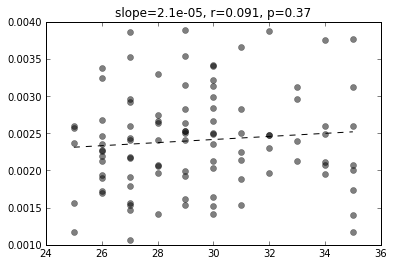

In [31]:
decaytau_reci_arr = np.array(decaytau_reci).reshape(-1,1)
age_ppr_ei = pd.DataFrame(data=np.concatenate([age_reci, decaytau_reci_arr], axis=1), columns=['age', 'decay_tau'])
age_ppr = age_ppr_ei.groupby(['age'])['decay_tau'].apply(list)
age_arr = []
ppr_arr = []
for age, ppr in zip(list(age_ppr.index), age_ppr.values):
    ppr = np.array(ppr)
    ppr[np.where(ppr>0.004)[0]] = np.nan
    ppr = ppr[np.logical_not(np.isnan(ppr))]
    if age >= 25:
        plt.plot(np.ones(len(ppr))*age, ppr, 'ko', alpha=0.5)
        age_arr.append(np.ones(len(ppr))*age)
        ppr_arr.append(ppr)
age_arr = np.hstack(age_arr)
ppr_arr = np.hstack(ppr_arr)
slope, intercept, r, p, _ = stats.linregress(age_arr, ppr_arr)
x = np.arange(min(age_arr), max(age_arr)+1, 1)
y = x * slope + intercept
plt.plot(x, y, 'k--')
plt.title('slope={slope:.2}, r={r:.2}, p={p:.2}'.format(slope=slope, r=r, p=p))
with PdfPages('/data/E_I_age_decay_tau.pdf') as pdf:
    pdf.savefig()

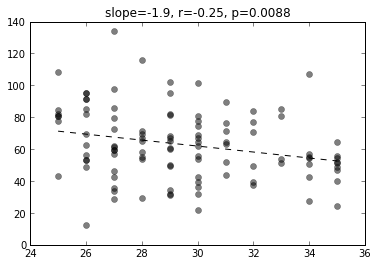

In [32]:
rin_reci2 = np.array(rin_reci) - (np.array(rs_reci) - 15)/20 * 50
rin_reci_arr = np.array(rin_reci2).reshape(-1,1)
age_ppr_ei = pd.DataFrame(data=np.concatenate([age_reci, rin_reci_arr], axis=1), columns=['age', 'rin_reci'])
age_ppr = age_ppr_ei.groupby(['age'])['rin_reci'].apply(list)
age_arr = []
ppr_arr = []
for age, ppr in zip(list(age_ppr.index), age_ppr.values):
    ppr = np.array(ppr)
    ppr[np.where(ppr>150)[0]]=np.nan
    ppr[np.where(ppr<0)[0]]=np.nan
    ppr = ppr[np.logical_not(np.isnan(ppr))]
    if age >= 25:
        plt.plot(np.ones(len(ppr))*age, ppr, 'ko', alpha=0.5)
        age_arr.append(np.ones(len(ppr))*age)
        ppr_arr.append(ppr)
age_arr = np.hstack(age_arr)
ppr_arr = np.hstack(ppr_arr)
slope, intercept, r, p, _ = stats.linregress(age_arr, ppr_arr)
x = np.arange(min(age_arr), max(age_arr)+1, 1)
y = x * slope + intercept
plt.plot(x, y, 'k--')
plt.title('slope={slope:.2}, r={r:.2}, p={p:.2}'.format(slope=slope, r=r, p=p))
# with PdfPages('/data/E_I_age_PPR.pdf') as pdf:
#     pdf.savefig()

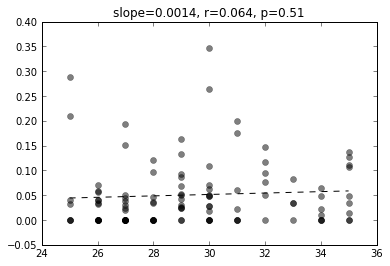

In [30]:
age_reci = np.array(age_reci).reshape(-1,1)
fail_reci_arr = np.array(fail_reci).reshape(-1,1)
age_ppr_ei = pd.DataFrame(data=np.concatenate([age_reci, fail_reci_arr], axis=1), columns=['age', 'fail_reci'])
age_ppr = age_ppr_ei.groupby(['age'])['fail_reci'].apply(list)
age_arr = []
ppr_arr = []
for age, ppr in zip(list(age_ppr.index), age_ppr.values):
    ppr = np.array(ppr)
    ppr[np.where(ppr>150)[0]]=np.nan
    ppr[np.where(ppr<0)[0]]=np.nan
    ppr = ppr[np.logical_not(np.isnan(ppr))]
    if age >= 25:
        plt.plot(np.ones(len(ppr))*age, ppr, 'ko', alpha=0.5)
        age_arr.append(np.ones(len(ppr))*age)
        ppr_arr.append(ppr)
age_arr = np.hstack(age_arr)
ppr_arr = np.hstack(ppr_arr)
slope, intercept, r, p, _ = stats.linregress(age_arr, ppr_arr)
x = np.arange(min(age_arr), max(age_arr)+1, 1)
y = x * slope + intercept
plt.plot(x, y, 'k--')
plt.title('slope={slope:.2}, r={r:.2}, p={p:.2}'.format(slope=slope, r=r, p=p))
plt.ylim([-0.05, 0.4])
with PdfPages('/data/E_I_age_fail.pdf') as pdf:
    pdf.savefig()

In [ ]:
data_reci.loc[i]

In [ ]:
data_reci.loc[i]['Ptl_note']=='50Hz EI preonly'

12 20


RanksumsResult(statistic=-2.8025961989814827, pvalue=0.005069309556701599)

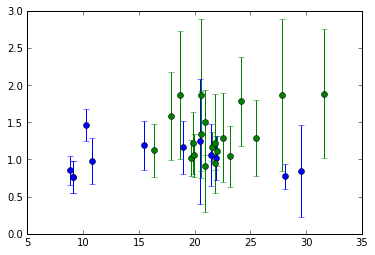

In [41]:
# Compare PPR bewteen reci and uni
ppr_uni = []
ppr_uni_std = []
rs_uni = []
for i, df in zip(processed_uni.Before.index, processed_uni.Before):
    if (data_uni.loc[i]['IS100'] == 1) and (np.nanmean(df['rs'])<40):
        ppr_uni.append(np.nanmean(df['PPR']))
        ppr_uni_std.append(np.nanstd(df['PPR']))
        rs_uni.append(np.nanmean(df['rs']))

ppr_reci = []
ppr_reci_std = []
rs_reci = []
for j in [3]:
    processed_reci = pd.read_pickle('/data/processed_EI_reci_all_{index}'.format(index=j))
    #processed_reci_ppr = processed_reci.copy()
    #processed_reci_ppr.drop(159, axis=0, inplace=True)

    for i, df in zip(processed_reci.Before.index, processed_reci.Before):
        if (data_reci.loc[i]['IS100'] >= 1) and (np.nanmean(df['rs'])<40):
            ppr_reci.append(np.nanmean(df['PPR']))
            ppr_reci_std.append(np.nanstd(df['PPR']))
            rs_reci.append(np.nanmean(df['rs']))
            
ppr_reci_arr = np.array(ppr_reci)
ppr_reci_std_arr = np.array(ppr_reci_std)
nan_index = np.where(ppr_reci_arr>2.5)[0]
ppr_reci_arr[nan_index]=np.nan
ppr_reci_std_arr[nan_index]=np.nan

print(len(rs_uni), len(rs_reci))
plt.errorbar(rs_uni, ppr_uni, ppr_uni_std, fmt='o')
plt.errorbar(rs_reci, ppr_reci_arr, ppr_reci_std_arr, fmt='o')
stats.ranksums(ppr_uni, ppr_reci_arr)

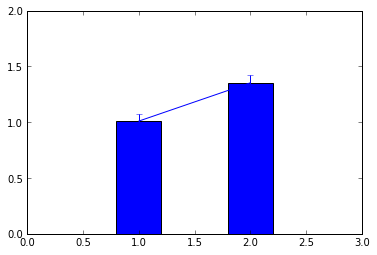

In [35]:
ppr_uni_mean = np.nanmean(ppr_uni)
ppr_uni_ste = np.nanstd(ppr_uni)/np.sqrt(len(ppr_uni))
ppr_reci_mean = np.mean(ppr_reci_arr)
ppr_reci_ste = np.nanstd(ppr_reci_arr)/np.sqrt(len(ppr_reci_arr))
plt.bar([1,2], [ppr_uni_mean, ppr_reci_mean], align='center', width=0.4)
plt.errorbar([1,2], [ppr_uni_mean, ppr_reci_mean], [ppr_uni_ste, ppr_reci_ste])
plt.xlim([0,3])
plt.ylim([0,2])

with PdfPages('/data/PPR_reci_uni.pdf') as pdf:
    pdf.savefig()

12 20


RanksumsResult(statistic=-1.0315111010140179, pvalue=0.30230120517690851)

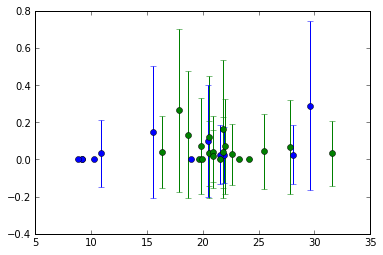

In [44]:
# Compare failure rate bewteen reci and uni
ppr_uni = []
ppr_uni_std = []
rs_uni = []
for i, df in zip(processed_uni.Before.index, processed_uni.Before):
    if (data_uni.loc[i]['IS100'] == 1) and (np.nanmean(df['rs'])<40):
        ppr_uni.append(np.nanmean(df['failure']))
        ppr_uni_std.append(np.nanstd(df['failure']))
        rs_uni.append(np.nanmean(df['rs']))

ppr_reci = []
ppr_reci_std = []
rs_reci = []
for j in [3]:
    processed_reci = pd.read_pickle('/data/processed_EI_reci_all_{index}'.format(index=j))
    #processed_reci_ppr = processed_reci.copy()
    #processed_reci_ppr.drop(159, axis=0, inplace=True)

    for i, df in zip(processed_reci.Before.index, processed_reci.Before):
        if (data_reci.loc[i]['IS100'] >= 1) and (np.nanmean(df['rs'])<40):
            ppr_reci.append(np.nanmean(df['failure']))
            ppr_reci_std.append(np.nanstd(df['failure']))
            rs_reci.append(np.nanmean(df['rs']))
            
ppr_reci_arr = np.array(ppr_reci)
ppr_reci_std_arr = np.array(ppr_reci_std)
nan_index = np.where(ppr_reci_arr>2.5)[0]
ppr_reci_arr[nan_index]=np.nan
ppr_reci_std_arr[nan_index]=np.nan

print(len(rs_uni), len(rs_reci))
plt.errorbar(rs_uni, ppr_uni, ppr_uni_std, fmt='o')
plt.errorbar(rs_reci, ppr_reci_arr, ppr_reci_std_arr, fmt='o')
stats.ranksums(ppr_uni, ppr_reci_arr)

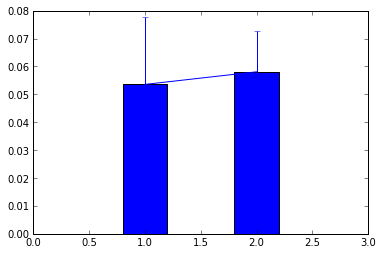

In [48]:
ppr_uni_mean = np.nanmean(ppr_uni)
ppr_uni_ste = np.nanstd(ppr_uni)/np.sqrt(len(ppr_uni))
ppr_reci_mean = np.mean(ppr_reci_arr)
ppr_reci_ste = np.nanstd(ppr_reci_arr)/np.sqrt(len(ppr_reci_arr))
plt.bar([1,2], [ppr_uni_mean, ppr_reci_mean], align='center', width=0.4)
plt.errorbar([1,2], [ppr_uni_mean, ppr_reci_mean], [ppr_uni_ste, ppr_reci_ste])
plt.xlim([0,3])
#plt.ylim([0,2])

with PdfPages('/data/Failure_rate_reci_uni.pdf') as pdf:
    pdf.savefig()

12 20


RanksumsResult(statistic=1.2845232578665129, pvalue=0.19895893109240215)

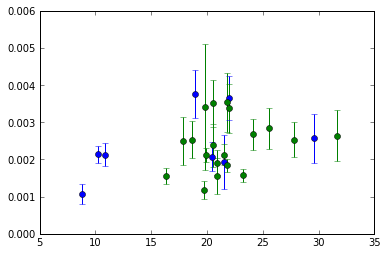

In [50]:
# Compare PPR bewteen reci and uni
ppr_uni = []
ppr_uni_std = []
rs_uni = []
for i, df in zip(processed_uni.Before.index, processed_uni.Before):
    if (data_uni.loc[i]['IS100'] == 1) and (np.nanmean(df['rs'])<40):
        ppr_uni.append(np.nanmean(df['decay_tau']))
        ppr_uni_std.append(np.nanstd(df['decay_tau']))
        rs_uni.append(np.nanmean(df['rs']))

ppr_uni_arr = np.array(ppr_uni)
ppr_uni_std_arr = np.array(ppr_uni_std)
nan_index = np.where(ppr_uni_arr>0.004)[0]
ppr_uni_arr[nan_index]=np.nan
ppr_uni_std_arr[nan_index]=np.nan

ppr_reci = []
ppr_reci_std = []
rs_reci = []
for j in [3]:
    processed_reci = pd.read_pickle('/data/processed_EI_reci_all_{index}'.format(index=j))
    #processed_reci_ppr = processed_reci.copy()
    #processed_reci_ppr.drop(159, axis=0, inplace=True)

    for i, df in zip(processed_reci.Before.index, processed_reci.Before):
        if (data_reci.loc[i]['IS100'] >= 1) and (np.nanmean(df['rs'])<40):
            ppr_reci.append(np.nanmean(df['decay_tau']))
            ppr_reci_std.append(np.nanstd(df['decay_tau']))
            rs_reci.append(np.nanmean(df['rs']))
            
ppr_reci_arr = np.array(ppr_reci)
ppr_reci_std_arr = np.array(ppr_reci_std)
nan_index = np.where(ppr_reci_arr>0.004)[0]
ppr_reci_arr[nan_index]=np.nan
ppr_reci_std_arr[nan_index]=np.nan

print(len(rs_uni), len(rs_reci))
plt.errorbar(rs_uni, ppr_uni_arr, ppr_uni_std_arr, fmt='o')
plt.errorbar(rs_reci, ppr_reci_arr, ppr_reci_std_arr, fmt='o')
stats.ranksums(ppr_uni, ppr_reci_arr)

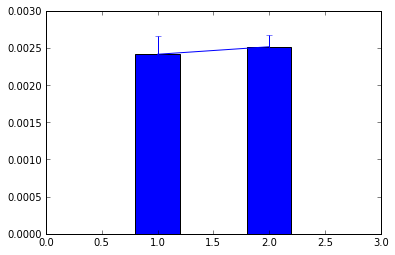

In [51]:
ppr_uni_mean = np.nanmean(ppr_uni_arr)
ppr_uni_ste = np.nanstd(ppr_uni_arr)/np.sqrt(len(ppr_uni_arr))
ppr_reci_mean = np.mean(ppr_reci)
ppr_reci_ste = np.nanstd(ppr_reci_arr)/np.sqrt(len(ppr_reci_arr))
plt.bar([1,2], [ppr_uni_mean, ppr_reci_mean], align='center', width=0.4)
plt.errorbar([1,2], [ppr_uni_mean, ppr_reci_mean], [ppr_uni_ste, ppr_reci_ste])
plt.xlim([0,3])
#plt.ylim([0,0.1])


with PdfPages('/data/Decay_tau_reci_uni.pdf') as pdf:
    pdf.savefig()

12 20


RanksumsResult(statistic=1.1677484162422844, pvalue=0.24290826090432394)

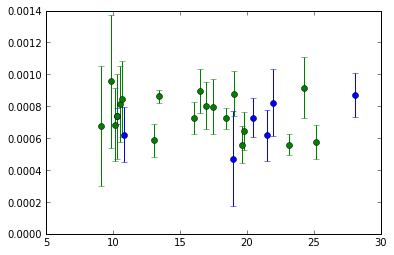

In [55]:
# Compare PPR bewteen reci and uni
ppr_uni = []
ppr_uni_std = []
rs_uni = []
for i, df in zip(processed_uni.Before.index, processed_uni.Before):
    if (data_uni.loc[i]['IS100'] == 1) and (np.nanmean(df['rs'])<40):
        ppr_uni.append(np.nanmean(df['onset_tau']))
        ppr_uni_std.append(np.nanstd(df['onset_tau']))
        rs_uni.append(np.nanmean(df['rs']))

ppr_uni_arr = np.array(ppr_uni)
ppr_uni_std_arr = np.array(ppr_uni_std)
nan_index = np.where(ppr_uni_arr>0.001)[0]
ppr_uni_arr[nan_index]=np.nan
ppr_uni_std_arr[nan_index]=np.nan

ppr_reci = []
ppr_reci_std = []
rs_reci = []
for j in [0]:
    processed_reci = pd.read_pickle('/data/processed_EI_reci_all_{index}'.format(index=j))
    #processed_reci_ppr = processed_reci.copy()
    #processed_reci_ppr.drop(159, axis=0, inplace=True)

    for i, df in zip(processed_reci.Before.index, processed_reci.Before):
        if (data_reci.loc[i]['IS100'] >= 1) and (np.nanmean(df['rs'])<40):
            ppr_reci.append(np.nanmean(df['onset_tau']))
            ppr_reci_std.append(np.nanstd(df['onset_tau']))
            rs_reci.append(np.nanmean(df['rs']))
            
ppr_reci_arr = np.array(ppr_reci)
ppr_reci_std_arr = np.array(ppr_reci_std)
nan_index = np.where(ppr_reci_arr>0.001)[0]
ppr_reci_arr[nan_index]=np.nan
ppr_reci_std_arr[nan_index]=np.nan

print(len(rs_uni), len(rs_reci))
plt.errorbar(rs_uni, ppr_uni_arr, ppr_uni_std_arr, fmt='o')
plt.errorbar(rs_reci, ppr_reci_arr, ppr_reci_std_arr, fmt='o')
stats.ranksums(ppr_uni, ppr_reci_arr)

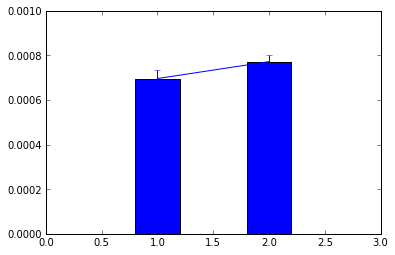

In [56]:
ppr_uni_mean = np.nanmean(ppr_uni_arr)
ppr_uni_ste = np.nanstd(ppr_uni_arr)/np.sqrt(len(ppr_uni_arr))
ppr_reci_mean = np.mean(ppr_reci)
ppr_reci_ste = np.nanstd(ppr_reci_arr)/np.sqrt(len(ppr_reci_arr))
plt.bar([1,2], [ppr_uni_mean, ppr_reci_mean], align='center', width=0.4)
plt.errorbar([1,2], [ppr_uni_mean, ppr_reci_mean], [ppr_uni_ste, ppr_reci_ste])
plt.xlim([0,3])
plt.ylim([0,0.001])


with PdfPages('/data/Onset_tau_reci_uni.pdf') as pdf:
    pdf.savefig()

13 20


RuntimeError: xdata and ydata must be the same length

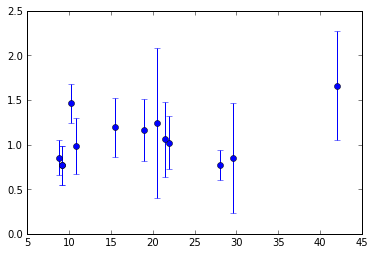

In [59]:
# Compare PPR bewteen reci and uni
ppr_uni = []
ppr_uni_std = []
rs_uni = []
for i, df in zip(processed_uni.Before.index, processed_uni.Before):
    if data_uni.loc[i]['IS100']==1:
        ppr_uni.append(np.nanmean(df['PPR']))
        ppr_uni_std.append(np.nanstd(df['PPR']))
        rs_uni.append(np.nanmean(df['rs']))
    
ppr_reci = []
ppr_reci_std = []
for j in range(5):
    processed_reci = pd.read_pickle('/data/processed_EI_reci_all_{index}'.format(index=j))
#     processed_reci_ppr = processed_reci.copy()
#     processed_reci_ppr.drop(159, axis=0, inplace=True)

    for i, df in zip(processed_reci.Before.index, processed_reci.Before):
        if data_reci.loc[i]['IS100'] == 1:
            ppr_reci.append(np.nanmean(df['PPR']))
            ppr_reci_std.append(np.nanstd(df['PPR']))

print(len(rs_uni), len(rs_reci))
plt.errorbar(rs_uni, ppr_uni, ppr_uni_std, fmt='o')
plt.errorbar(rs_reci, ppr_reci, ppr_reci_std, fmt='o')
stats.ranksums(ppr_uni, ppr_reci)

In [ ]:
# No difference in Rin, Ronset, Rdecay
# Compare PPR bewteen reci and uni
ppr_uni = []
ppr_uni_std = []
rs_uni = []
for i, df in zip(processed_uni.Before.index, processed_uni.Before):
    if data_uni.loc[i]['IS100']==1:
        ppr_uni.append(np.nanmean(df['ir']))
        ppr_uni_std.append(np.nanstd(df['ir']))
        rs_uni.append(np.nanmean(df['rs']))
    
ppr_reci = []
ppr_reci_std = []
rs_reci = []
for i, df in zip(processed_reci.Before.index, processed_reci.Before):
    if data_reci.loc[i]['IS100']==1:
        ppr_reci.append(np.nanmean(df['ir']))
        ppr_reci_std.append(np.nanstd(df['ir']))
        rs_reci.append(np.nanmean(df['rs']))

                
ppr_ie = []
ppr_ie_std = []
rs_ie  = []
for i, df in zip(processed_I_E.Before.index, processed_I_E.Before):
    if data_ie.loc[i]['IS100']==1:
        ppr_ie.append(np.nanmean(df['ir']))
        ppr_ie_std.append(np.nanstd(df['ir']))
        rs_ie.append(np.nanmean(df['rs']))

print(len(rs_uni), len(rs_reci), len(rs_ie))
ppr_uni = rs_corr(ppr_uni, rs_uni)
ppr_reci =  rs_corr(ppr_reci, rs_reci)
ppr_ie = rs_corr(ppr_ie, rs_ie)
plt.errorbar(rs_uni, ppr_uni , ppr_uni_std, fmt='o')
plt.errorbar(rs_reci, ppr_reci, ppr_reci_std, fmt='o')
plt.errorbar(rs_ie, ppr_ie, ppr_ie_std, fmt='o')
stats.ranksums(ppr_uni, ppr_reci)
#plt.xlim([7,30])
# plt.ylim([10, 150])

In [ ]:
ppr_uni_mean = np.nanmean(ppr_uni)
ppr_uni_ste = np.nanstd(ppr_uni)/np.sqrt(np.sum(~np.isnan(ppr_uni)))
ppr_reci_mean = np.nanmean(ppr_reci)
ppr_reci_ste = np.nanstd(ppr_reci)/np.sqrt(np.sum(~np.isnan(ppr_reci)))
plt.bar([1,2], [ppr_uni_mean, ppr_reci_mean], align='center', width=0.4)
plt.errorbar([1,2], [ppr_uni_mean, ppr_reci_mean], [ppr_uni_ste, ppr_reci_ste])
plt.xlim([0,3])
plt.ylim([0,90])

with PdfPages('/data/figure_0_8.pdf') as pdf:
    pdf.savefig()

In [ ]:
# No difference in Rin, Ronset, Rdecay
# Compare PPR bewteen reci and uni
processed_uni_decay = processed_uni.copy()
processed_uni_decay.drop([44, 54], axis=0, inplace=1)
ppr_uni = []
ppr_uni_std = []
rs_uni = []
for i, df in zip(processed_uni_decay.Before.index, processed_uni.Before):
    ppr_uni.append(np.nanmean(df['raw_decay_tau']))
    ppr_uni_std.append(np.nanstd(df['raw_decay_tau']))
    rs_uni.append(np.nanmean(df['raw_amp1']))
    
ppr_reci = []
ppr_reci_std = []
rs_reci = []
for i, df in zip(processed_reci.Before.index, processed_reci.Before):
    ppr_reci.append(np.nanmean(df['raw_decay_tau']))
    ppr_reci_std.append(np.nanstd(df['raw_decay_tau']))
    rs_reci.append(np.nanmean(df['raw_amp1']))

print(len(rs_uni), len(rs_reci))
plt.errorbar(rs_uni, rs_corr(ppr_uni, rs_uni), ppr_uni_std, fmt='o')
plt.errorbar(rs_reci, rs_corr(ppr_reci, rs_reci), ppr_reci_std, fmt='o')
stats.ranksums(ppr_uni, ppr_reci)
#plt.xlim([7,30])
# plt.ylim([10, 150])

In [ ]:
ppr_uni_mean = np.nanmean(ppr_uni)
ppr_uni_ste = np.nanstd(ppr_uni)/np.sqrt(np.sum(~np.isnan(ppr_uni)))
ppr_reci_mean = np.nanmean(ppr_reci)
ppr_reci_ste = np.nanstd(ppr_reci)/np.sqrt(np.sum(~np.isnan(ppr_reci)))
plt.bar([1,2], [ppr_uni_mean*1000, ppr_reci_mean*1000], align='center', width=0.4)
plt.errorbar([1,2], [ppr_uni_mean*1000, ppr_reci_mean*1000], [ppr_uni_ste*1000, ppr_reci_ste*1000])
plt.xlim([0,3])
plt.ylim([0,2])

with PdfPages('/data/figure_0_9.pdf') as pdf:
    pdf.savefig()

In [ ]:
# No difference in Rin, Ronset, Rdecay
# Compare PPR bewteen reci and uni        
ppr_uni = []
ppr_uni_std = []
rs_uni = []
for i, df in zip(processed_uni.Before.index, processed_uni.Before):
    if data_uni.loc[i]['IS100']==1:
        ppr_uni.append(np.nanmean(df['raw_onset_tau']))
        ppr_uni_std.append(np.nanstd(df['raw_onset_tau']))
        rs_uni.append(np.nanmean(df['raw_amp1']))
    
ppr_reci = []
ppr_reci_std = []
rs_reci = []
for i, df in zip(processed_reci.Before.index, processed_reci.Before):
    if data_reci.loc[i]['IS100']==1:
        ppr_reci.append(np.nanmean(df['raw_onset_tau']))
        ppr_reci_std.append(np.nanstd(df['raw_onset_tau']))
        rs_reci.append(np.nanmean(df['raw_amp1']))

print(len(rs_uni), len(rs_reci))
plt.errorbar(rs_uni, rs_corr(ppr_uni, rs_uni), ppr_uni_std, fmt='o')
plt.errorbar(rs_reci, rs_corr(ppr_reci, rs_reci), ppr_reci_std, fmt='o')
stats.ranksums(ppr_uni, ppr_reci)
#plt.xlim([7,30])
# plt.ylim([10, 150])

In [ ]:
ppr_uni_mean = np.nanmean(ppr_uni)
ppr_uni_ste = np.nanstd(ppr_uni)/np.sqrt(np.sum(~np.isnan(ppr_uni)))
ppr_reci_mean = np.nanmean(ppr_reci)
ppr_reci_ste = np.nanstd(ppr_reci)/np.sqrt(np.sum(~np.isnan(ppr_reci)))
plt.bar([1,2], [ppr_uni_mean*1000, ppr_reci_mean*1000], align='center', width=0.4)
plt.errorbar([1,2], [ppr_uni_mean*1000, ppr_reci_mean*1000], [ppr_uni_ste*1000, ppr_reci_ste*1000])
plt.xlim([0,3])
#plt.ylim([0,0.0008])

with PdfPages('/data/figure_0_10.pdf') as pdf:
    pdf.savefig()

In [ ]:
# No difference in Rin, Ronset, Rdecay
# Compare PPR bewteen reci and uni
def rs_corr(rin, rs):
    for i in range(len(rin)):
        rin[i] = rin[i] - max([rs[i] - 10, 0]) * 1.5
    return rin
        
ppr_uni = []
ppr_uni_std = []
rs_uni = []
for i, df in zip(processed_uni.Before.index, processed_uni.Before):
    if data_uni.loc[i]['IS100']==1:
        ppr_uni.append(np.nanmean(df['decay_tau']))
        ppr_uni_std.append(np.nanmean(df['decay_tau']))
        rs_uni.append(np.nanmean(df['rs']))
    
ppr_reci = []
ppr_reci_std = []
rs_reci = []
for i, df in zip(processed_reci.Before.index, processed_reci.Before):
    if data_reci.loc[i]['IS100']==1:
        ppr_reci.append(np.nanmean(df['decay_tau']))
        ppr_reci_std.append(np.nanmean(df['decay_tau']))
        rs_reci.append(np.nanmean(df['rs']))

print(len(rs_uni), len(rs_reci))
plt.errorbar(rs_uni, ppr_uni, ppr_uni_std, fmt='o')
plt.errorbar(rs_reci, ppr_reci, ppr_reci_std, fmt='o')
stats.ranksums(ppr_uni, ppr_reci)
#plt.xlim([7,30])
# plt.ylim([10, 150])

In [ ]:
plt.boxplot([ppr_uni, ppr_reci], 0, 'gD')

In [ ]:
# processed_old_reci = patch_pip.df_ana(data_uni, '/data/prcessed_old_reci')
# processed_young_reci = pd.read_pickle('/data/processed_young_reci')
# processed_reci = pd.concat([processed_old_reci, processed_young_reci], axis=0)
# # Compare PPR bewteen old reci and old uni
# ppr_old_uni = []
# ppr_old_uni_std = []
# rs_old_uni = []
# for i in processed_old_uni.Before:
#     ppr_old_uni.append(np.nanmean(i['PPR']))
#     ppr_old_uni_std.append(np.nanstd(i['PPR']))
#     rs_old_uni.append(np.nanmean(i['ave_amp1']))
    
# # ppr_old_reci = []
# # ppr_ord_reci_std = []
# # rs_old_reci = []
# # for i in processed_reci.Before:
# #     ppr_old_reci.append(np.nanmean(i['PPR']))
# #     ppr_ord_reci_std.append(np.nanstd(i['PPR']))
# #     rs_old_reci.append(np.nanmean(i['ave_amp1']))
    
# # plt.errorbar(rs_old_uni, ppr_old_uni, ppr_old_uni_std, fmt='o')
# # plt.errorbar(rs_old_reci, ppr_old_reci, ppr_ord_reci_std, fmt='o')
# # stats.ttest_ind(ppr_old_uni, ppr_old_reci)
# # #plt.xlim([7,30])
# # # plt.ylim([10, 150])

In [ ]:
data_E_I = data[(data['E-I']==1)]
data_I_E = data[(data['E-I']==0)]
print("data_E_I:{},data_I_E:{}"
      .format(len(data_E_I),len(data_I_E)))

In [ ]:
data_E_I.iloc[0]

In [ ]:
# for i in range(5):
#     patch_pip.df_ana(data_E_I.iloc[i*20:(i+1)*20], '/data/processed_E_I_'+str(i))

In [ ]:
#patch_pip.df_ana(data_E_I, '/data/processed_E_I')
#patch_pip.df_ana(data_I_E, '/data/processed_I_E')
processed_E_I = pd.read_pickle('/data/processed_E_I_1')
processed_I_E = pd.read_pickle('/data/processed_I_E')

In [ ]:
# Input resistance
rin_EI = []
rs_EI = []
for i in processed_E_I.Before:
    rin_EI.append(np.nanmean(i['ir']))
    rs_EI.append(np.nanmean(i['rs']))
    
rin_IE= []
rs_IE = []
for i in processed_I_E.Before:
    rin_IE.append(np.nanmean(i['ir']))
    rs_IE.append(np.nanmean(i['rs']))
    
plt.plot(rs_EI, rin_EI, 'b.')
plt.plot(rs_IE, rin_IE, 'r.')
#plt.xlim([7,30])
#plt.ylim([10, 150])

In [ ]:
len(rs_IE)

In [ ]:
# for j in processed_old_uni.Before.index:
#     for i in range(len(processed_old_uni.Before.loc[j]['trace_y1'])):
#         plt.figure()
#         plt.plot(processed_old_uni.Before.loc[j]['trace_y1'][i])
#         plt.plot(processed_old_uni.Before.loc[j]['trace_y2'][i])
#         plt.title('index{a}:'.format(a=j)+ str(processed_old_uni.Before.loc[j]['PPR'][i]))

In [ ]:
for j in [159]:
    for i in range(len(processed_reci.Before.loc[j]['trace_y1'])):
        plt.figure()
        plt.plot(processed_reci.Before.loc[j]['trace_y1'][i])
        plt.plot(processed_reci.Before.loc[j]['trace_y2'][i])
        plt.title('index{a}:'.format(a=j)+ str(processed_reci.Before.loc[j]['PPR'][i]))

In [ ]:
data_reci_all = data[(data.Reci == 1)&(data.IS100==1)&(data['E-I']==1)]
len(data_reci_all)

age_list = []
PPR_list = []
Rin_list = []
Rs_list = []
data_reci_all = data[(data.Reci == 1)&(data.IS100==1)&(data['E-I']==1)][:30]
processed_reci = patch_pip.df_ana(data_reci_all, 'prcessed_reci', if_save=False)
for j in processed_reci.index:
    age_list.append(data_reci_all.loc[j]['Age'])
    PPR_list.append(np.nanmean(processed_reci.Before.loc[j]['PPR']))
    Rin_list.append(np.nanmean(processed_reci.Before.loc[j]['ir']))
    Rs_list.append(np.nanmean(processed_reci.Before.loc[j]['rs']))

data_reci_all = data[(data.Reci == 1)&(data.IS100==1)&(data['E-I']==1)][31:60]
processed_reci = patch_pip.df_ana(data_reci_all, 'prcessed_reci', if_save=False)
for j in processed_reci.index:
    age_list.append(data_reci_all.loc[j]['Age'])
    PPR_list.append(np.nanmean(processed_reci.Before.loc[j]['PPR']))
    Rin_list.append(np.nanmean(processed_reci.Before.loc[j]['ir']))
    Rs_list.append(np.nanmean(processed_reci.Before.loc[j]['rs']))

data_reci_all = data[(data.Reci == 1)&(data.IS100==1)&(data['E-I']==1)][61:90]
processed_reci = patch_pip.df_ana(data_reci_all, 'prcessed_reci', if_save=False)
for j in processed_reci.index:
    age_list.append(data_reci_all.loc[j]['Age'])
    PPR_list.append(np.nanmean(processed_reci.Before.loc[j]['PPR']))
    Rin_list.append(np.nanmean(processed_reci.Before.loc[j]['ir']))
    Rs_list.append(np.nanmean(processed_reci.Before.loc[j]['rs']))

data_reci_all = data[(data.Reci == 1)&(data.IS100==1)&(data['E-I']==1)][91:102]
processed_reci = patch_pip.df_ana(data_reci_all, 'prcessed_reci', if_save=False)
for j in processed_reci.index:
    age_list.append(data_reci_all.loc[j]['Age'])
    PPR_list.append(np.nanmean(processed_reci.Before.loc[j]['PPR']))
    Rin_list.append(np.nanmean(processed_reci.Before.loc[j]['ir']))
    Rs_list.append(np.nanmean(processed_reci.Before.loc[j]['rs']))

df_age_PPR = pd.DataFrame(data=np.vstack([age_list, PPR_list,Rin_list, Rs_list]).transpose(), columns=['age', 'PPR', 'rin', 'rs'])

In [ ]:
# df_age_PPR.to_csv('/data/age_PPR_reci_rin_rs')
df_age_PPR = pd.read_csv('/data/age_PPR_reci_rin_rs')
df_age_PPR.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df_age_PPR.head()

In [ ]:
# Dependence of PPR on age
plt.plot(df_age_PPR.age, df_age_PPR.PPR, '.')

In [ ]:
import scipy

In [ ]:
stats.ttest_ind(ppr_old_uni, ppr_old_reci)

In [ ]:
processed_young_uni = patch_pip.df_ana(data_young_uni, 'prcessed_young_uni', if_save=False)
# processed_young_reci = patch_pip.df_ana(data_young_reci, 'prcessed_young_reci', if_save=False)

In [ ]:
for i, trial in enumerate(processed_young_uni.Before):
    plt.plot(trial['trace_rin']-np.mean(trial['trace_rin'][:1000]), label=processed_young_uni.Before.index[i])

plt.legend()

In [ ]:
data_young_uni

In [ ]:
for df in processed_young_uni.Before:
    plt.plot(df['trace_rin'])

In [ ]:
processed_young_uni.Before

In [ ]:
patch_pip.df_ana(sample_data,'sample_data')
processed_sample_data = pd.read_pickle('sample_data')

In [ ]:
processed_sample_data.Before.iloc[0].keys()

In [ ]:
prcessed_test = processed_sample_data.Before.iloc[0]
resp1 = np.vstack(prcessed_test['trace_y1'])

In [ ]:
prcessed_test['raw_decay_tau']

In [ ]:
prcessed_test['ir']

In [ ]:
prcessed_test['raw_decay_tau'].shape

In [ ]:
len(prcessed_test['decay_tau'])

In [ ]:
prcessed_test['raw_onset_tau']

In [ ]:
plt.plot(resp1.mean(axis=0))

In [ ]:
plt.plot(prcessed_test['trace_y1'])

In [ ]:
# Write function to analyze input resistance and firing property of each cell


In [ ]:
# Write function to analyze synaptic property, paired pulse ratio, onset decay time constant

In [ ]:
# Group based on age